# STEP 5: Seasonality Analysis

Study the seasonality of the top-viewed topics for each country using autocorrelation plots, periodogram, time serie decomposition (data can be decomposed either as the sum or product of trend, seasonality and residual components).

- Study the seasonaliy of the pageview trends for different topics for the same country
- Study the seasonality of pageview trends for a same topic for different languages 
- Compare the seasonality patterns of pageview trends for mobile VS desktop


Seasonality tests: https://sylwiagrudkowska.github.io/JDemetra-documentation/pages/case-studies/seasonalitytests.html#:~:text=The%20Friedman%20test%20requires%20no,outcome%20is%20displayed%20in%20green 

Autocorrelation on seasonal lags: Ljung-Box test -> allows to determine if observations are independant and random over time, by looking at the correlation between the actual observation and observation lagged by a certain amount of time 

Friedman test: non-parametric method for testing that **samples are drawn from the same population or from populations with equal medians**. In the regression equation the significance of the month (or quarter) effect is tested. The Friedman test requires no distributional assumptions. It uses the rankings of the observations. If the null hypothesis of no stable seasonality is rejected at the 0.1% significance level, pValue<0.001
, then the series is considered to be seasonal and the test’s outcome is displayed in green.

Kruskal-Wallis test: non-parametric test used for **comparing samples from two or more groups**. The null hypothesis states that all months (or quarters, respectively) have the same mean. Under this hypothesis the test statistic follows a χ2 distribution. When this hypothesis is rejected, it is assumed that time series values differ significantly between periods and the test’s results are displayed in green.

Tukey periodogram

In [22]:
from sklearn.ensemble import IsolationForest
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima


In [8]:
df_timeseries = pd.read_csv('data/df_timeseries_prepro.csv')

In [9]:
display(df_timeseries)

,language,date,topic,pageviews_norm,mobile,lang
0,ja,2018-01-01,Culture.Biography.Biography*,0.017426,0,ja
1,ja,2018-01-02,Culture.Biography.Biography*,0.016001,0,ja
2,ja,2018-01-03,Culture.Biography.Biography*,0.015715,0,ja
3,ja,2018-01-04,Culture.Biography.Biography*,0.014338,0,ja
4,ja,2018-01-05,Culture.Biography.Biography*,0.014520,0,ja
...,...,...,...,...,...,...
1569147,de.m,2020-07-27,STEM.Technology,0.019914,1,de
1569148,de.m,2020-07-28,STEM.Technology,0.021485,1,de
1569149,de.m,2020-07-29,STEM.Technology,0.022255,1,de
1569150,de.m,2020-07-30,STEM.Technology,0.023183,1,de


I have a dataframe with the following features:
- language 
- date
- topic 
- pageviews_norm
- mobile (1 if the person uses mobile and 0 if the person uses desktop)

I would like to study the seasonality of pageview trends for a same topic (eg for 'Culture.Sports') for different languages. What do you suggest? Give me code in python

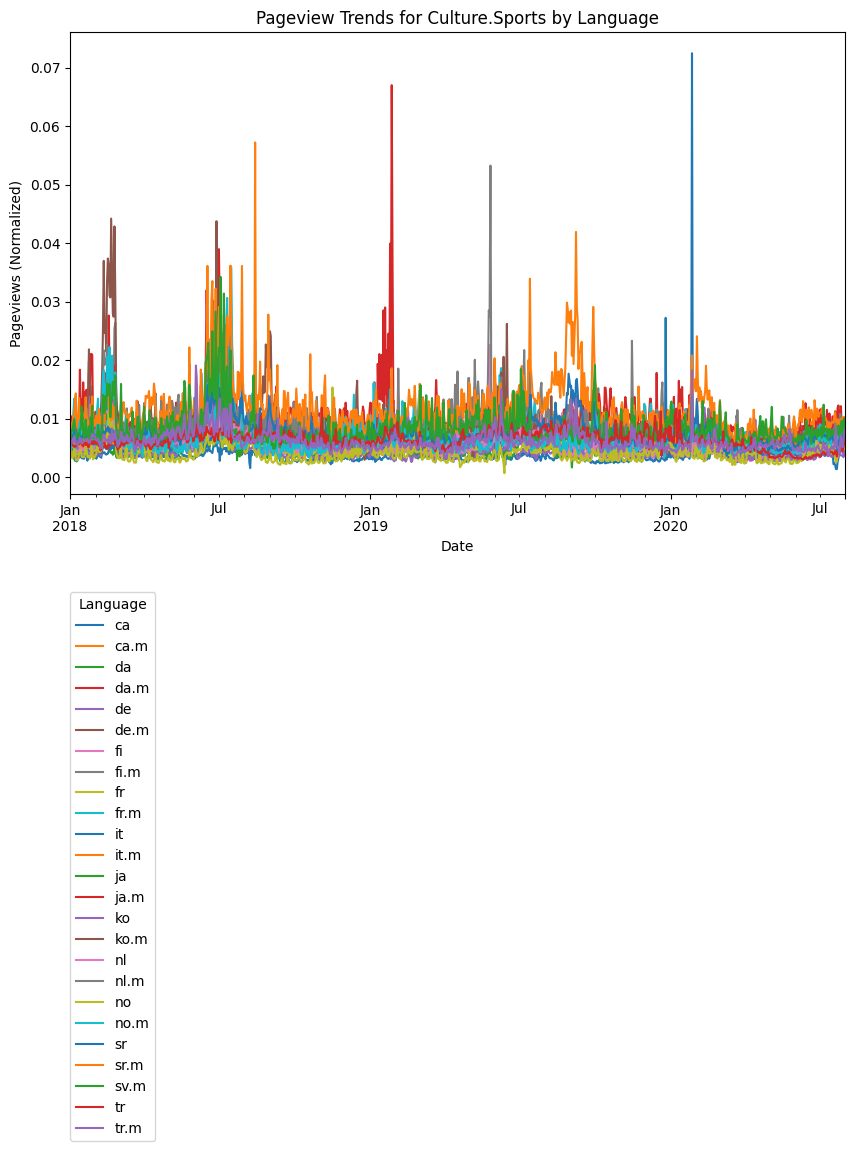

In [31]:
df_timeseries["log_views"] = np.log(df_timeseries.pageviews_norm) # no used for now

df_timeseries['date'] = pd.to_datetime(df_timeseries['date'])

df_topic = df_timeseries[(df_timeseries['topic'] == 'Culture.Sports') & (df_timeseries['language'] != 'sv')]

pivot_df = df_topic.pivot(index='date', columns='language', values='pageviews_norm')

pivot_df.plot(figsize=(10, 6))
plt.title('Pageview Trends for Culture.Sports by Language')
plt.xlabel('Date')
plt.ylabel('Pageviews (Normalized)')
plt.legend(title='Language', loc=(0,-1.4))
plt.show()

In [32]:
display(pivot_df)

language,ca,ca.m,da,da.m,de,de.m,fi,fi.m,fr,fr.m,...,ko.m,nl,nl.m,no,no.m,sr,sr.m,sv.m,tr,tr.m
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,0.003982,0.004774,0.004260,0.005961,0.004010,0.004788,0.006011,0.007478,0.004616,0.005085,...,0.007237,0.006017,0.007893,0.006435,0.006857,0.006098,0.007268,0.007674,0.007142,0.005958
2018-01-02,0.003601,0.004987,0.004184,0.007316,0.004119,0.004655,0.005840,0.009276,0.004266,0.005239,...,0.007735,0.006095,0.008129,0.004377,0.004745,0.006661,0.008075,0.006789,0.005740,0.005848
2018-01-03,0.003776,0.005994,0.003700,0.006669,0.003589,0.004073,0.005374,0.006686,0.004327,0.005719,...,0.007736,0.005311,0.006710,0.003371,0.005759,0.006895,0.009112,0.007989,0.006253,0.005757
2018-01-04,0.003656,0.007953,0.003652,0.008600,0.003753,0.004472,0.004997,0.006085,0.004253,0.005649,...,0.007963,0.005199,0.006693,0.003202,0.006413,0.006852,0.009487,0.007955,0.005589,0.006366
2018-01-05,0.003744,0.005959,0.003527,0.006521,0.003568,0.004562,0.005474,0.006819,0.004367,0.005782,...,0.008998,0.005519,0.007075,0.003570,0.010850,0.007261,0.010477,0.008940,0.005319,0.006019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,0.004764,0.007222,0.006559,0.008136,0.003730,0.004674,0.005705,0.006909,0.005105,0.007314,...,0.008158,0.006146,0.007503,0.005841,0.006958,0.006612,0.009484,0.009655,0.005223,0.006242
2020-07-28,0.004186,0.006532,0.005725,0.007219,0.003610,0.004481,0.005112,0.005613,0.004571,0.006701,...,0.006303,0.005792,0.006904,0.004707,0.005497,0.007286,0.010131,0.007477,0.004467,0.005101
2020-07-29,0.003957,0.005730,0.005913,0.009106,0.003404,0.004309,0.005107,0.005688,0.004535,0.006583,...,0.006280,0.005632,0.006494,0.005027,0.006338,0.006956,0.010260,0.007729,0.005088,0.006230


Long to compute

c:\Users\blanc\.pyenv\pyenv-win\versions\3.10.5\lib\site-packages\statsmodels\tsa\seasonal.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(len(series), 1, sharex=True)


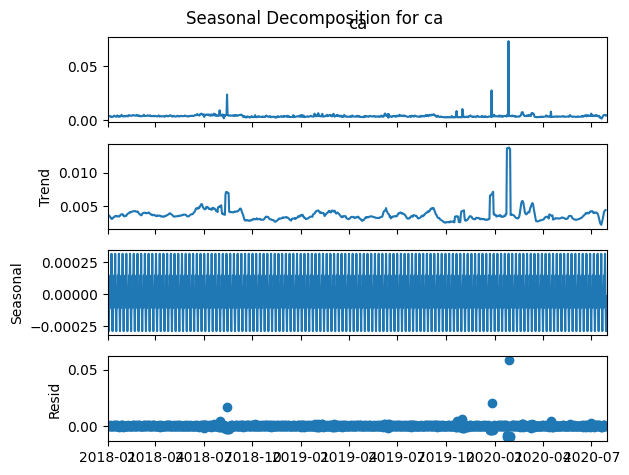

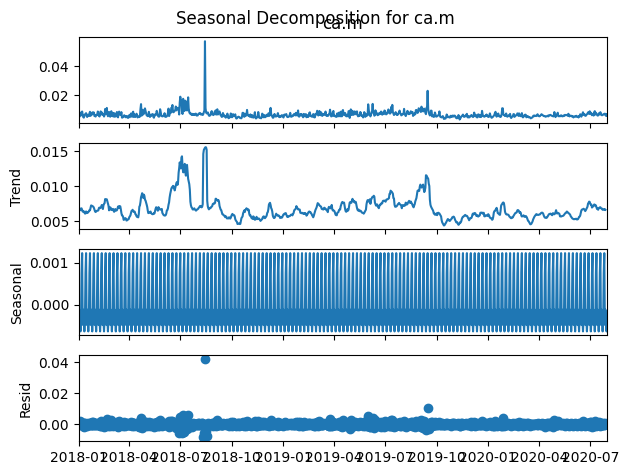

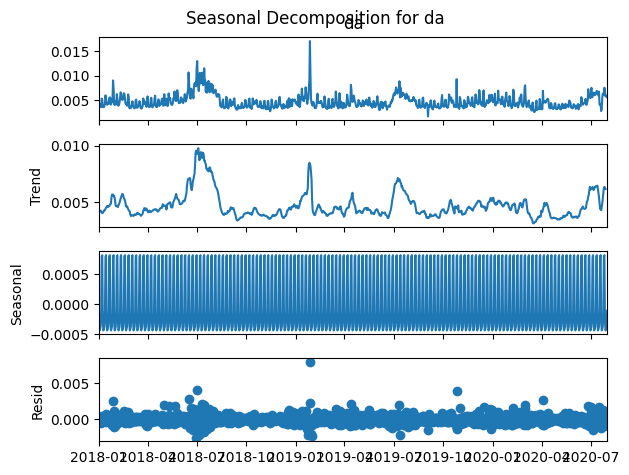

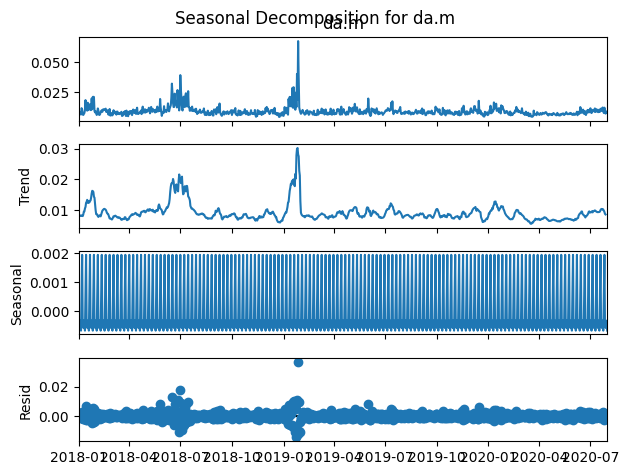

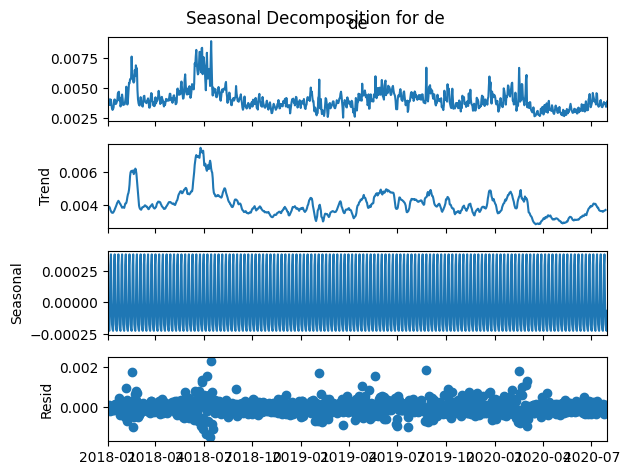

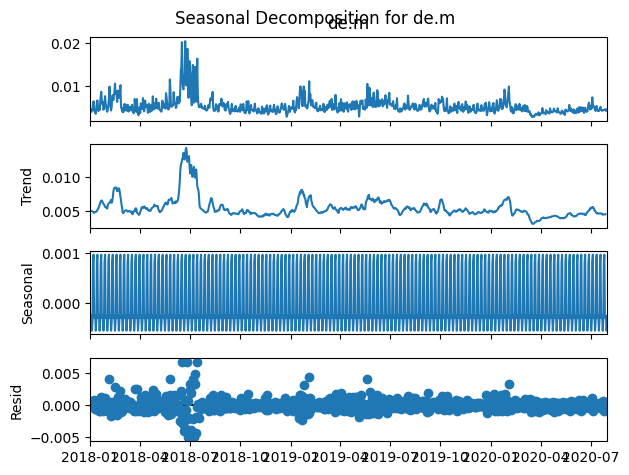

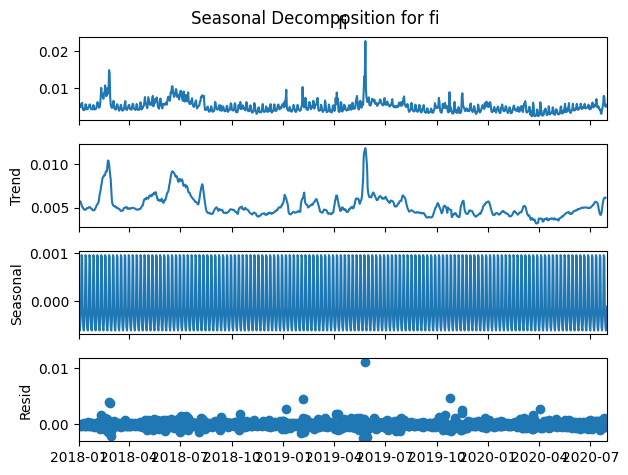

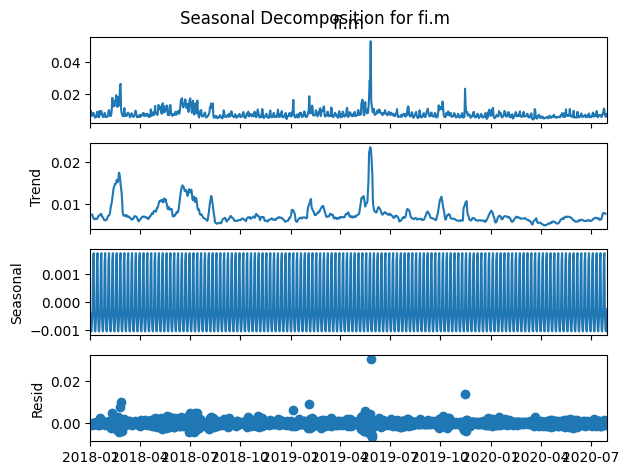

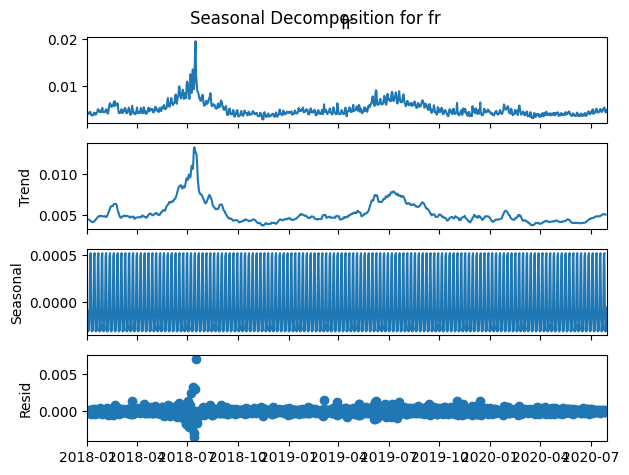

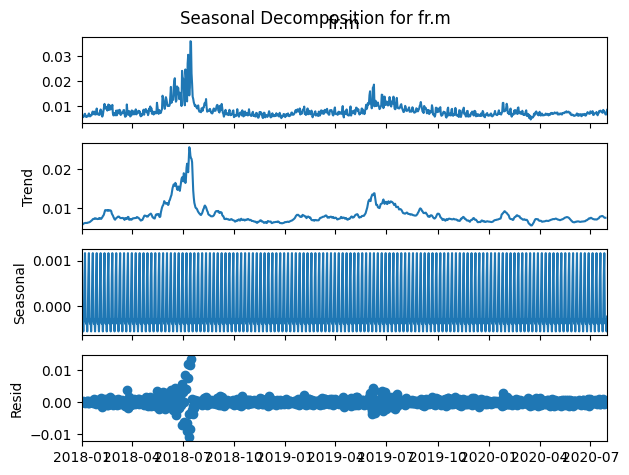

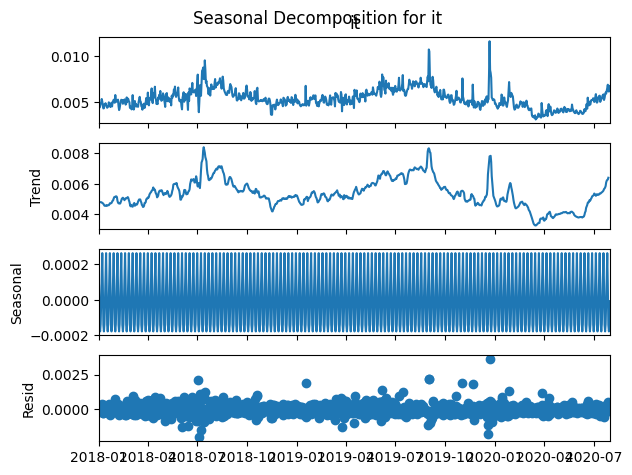

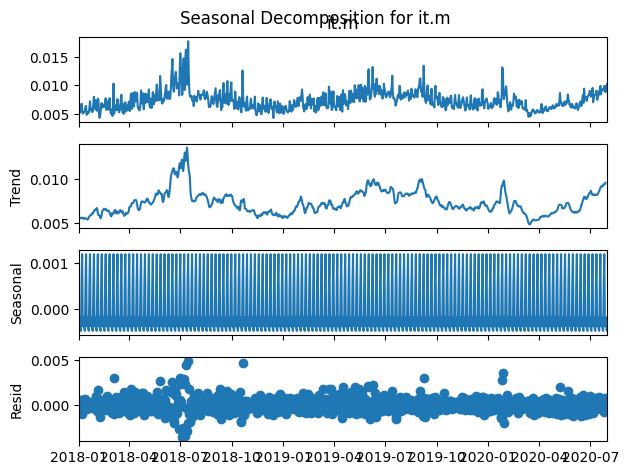

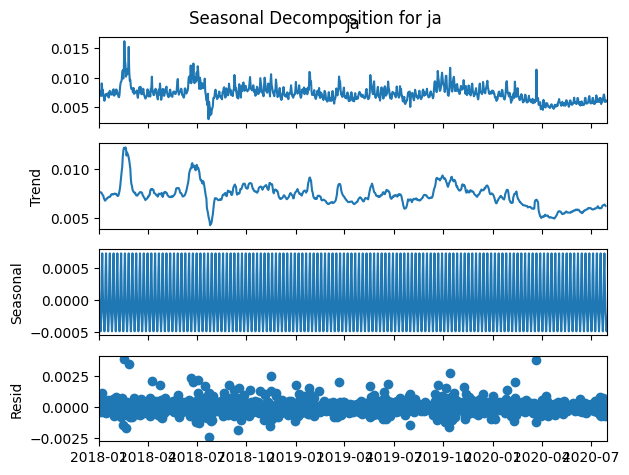

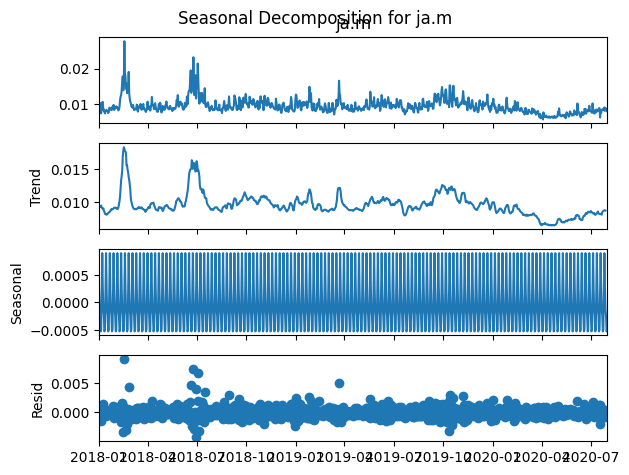

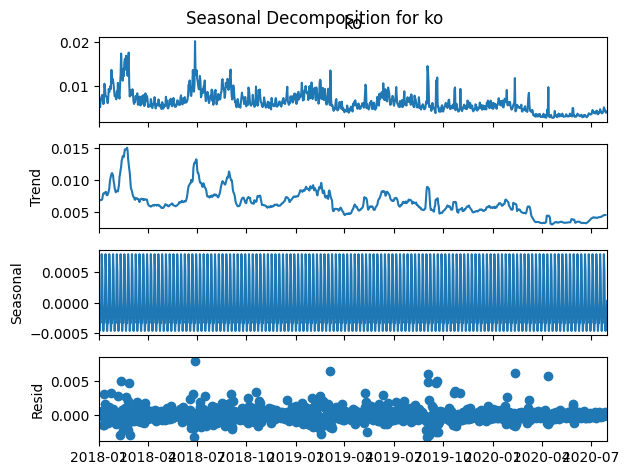

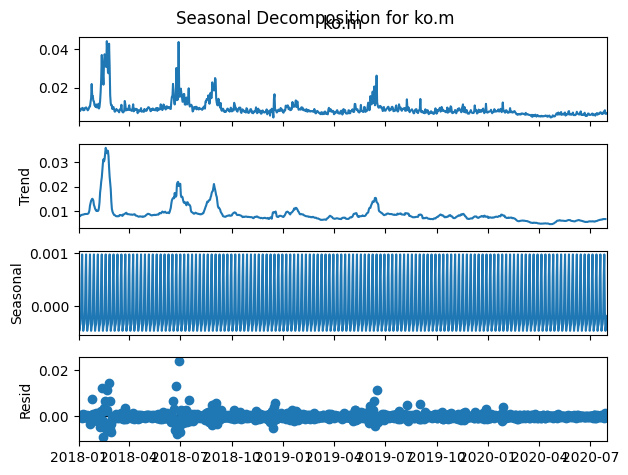

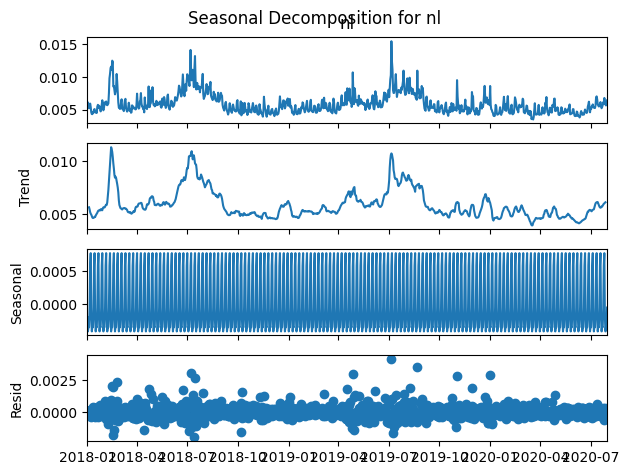

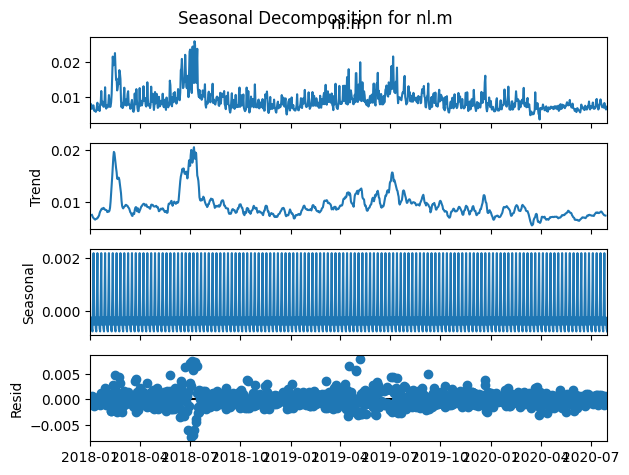

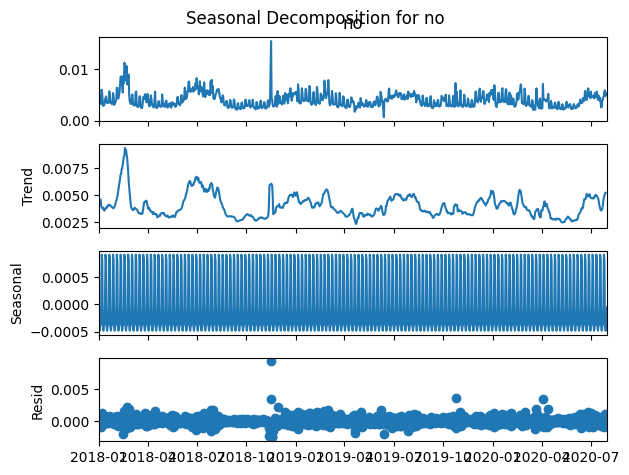

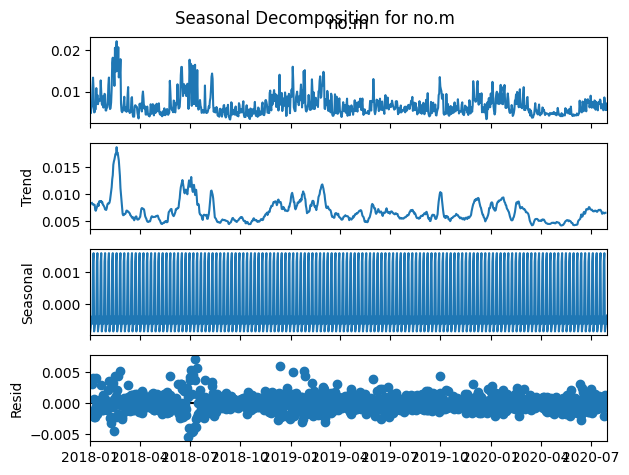

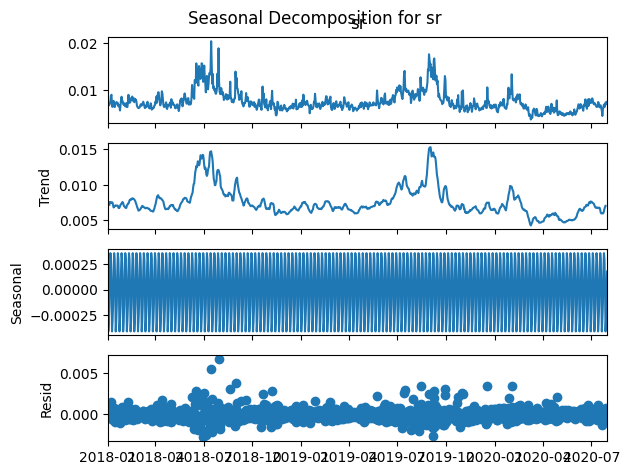

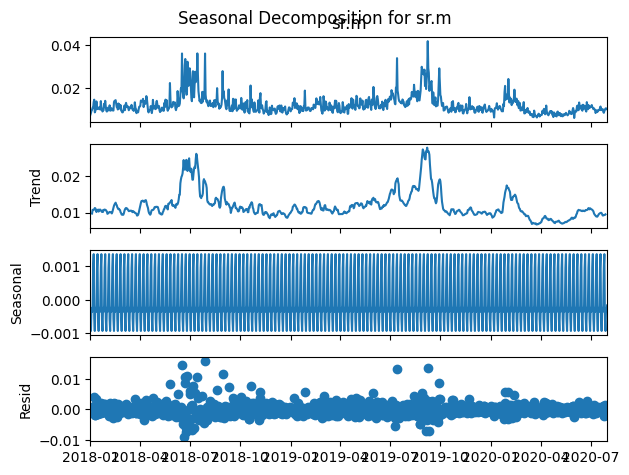

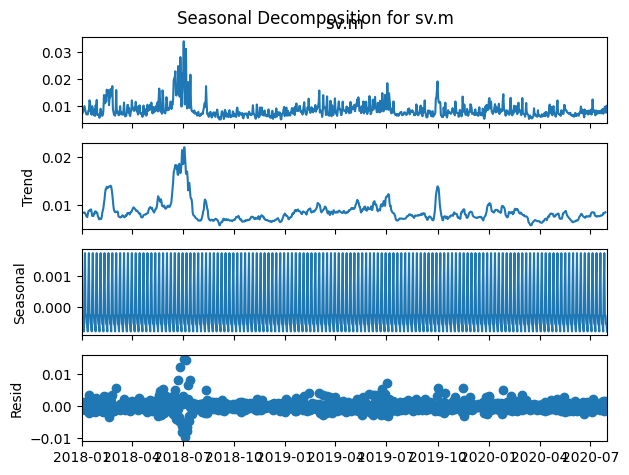

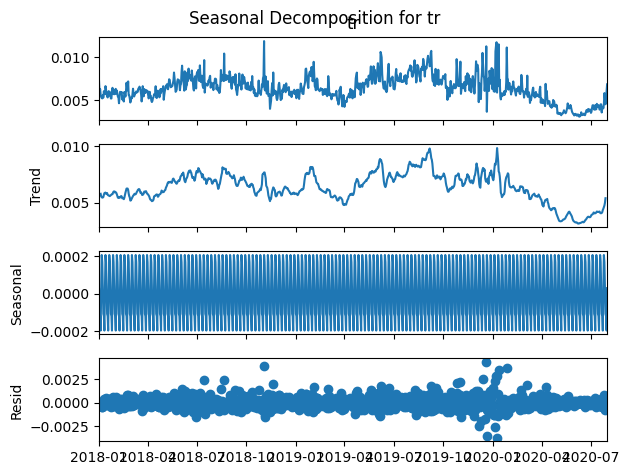

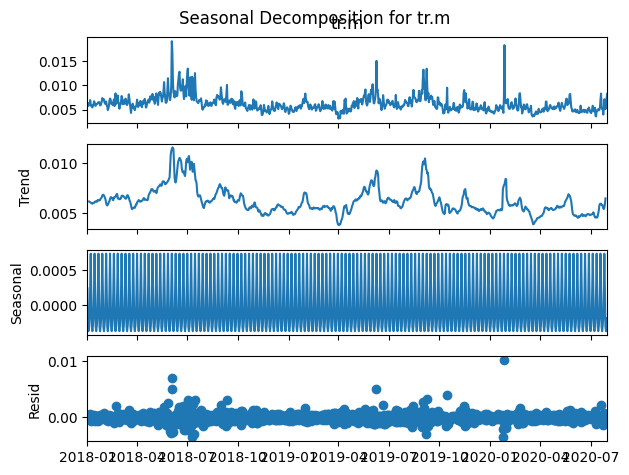

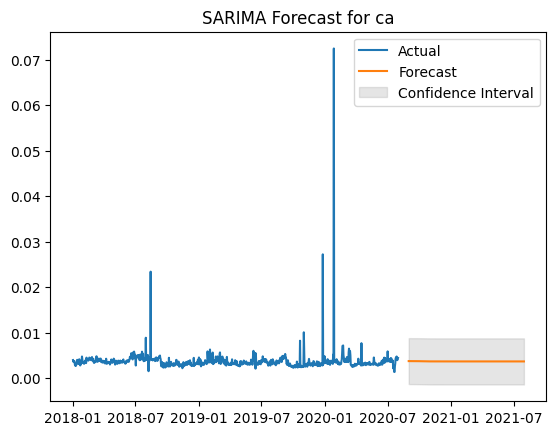

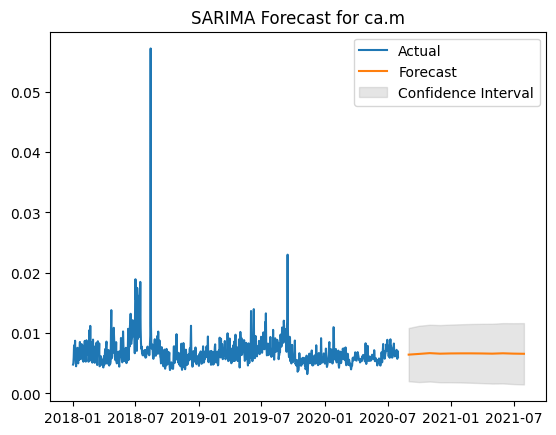

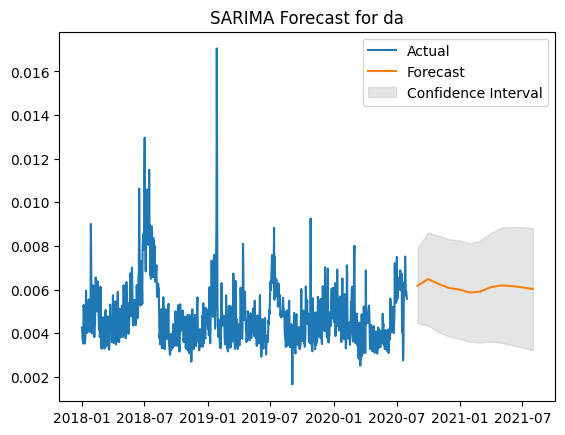

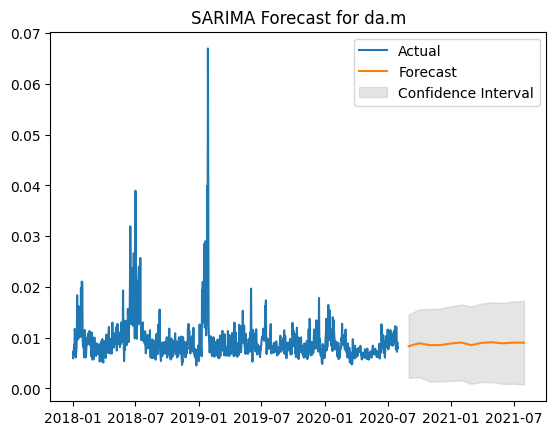

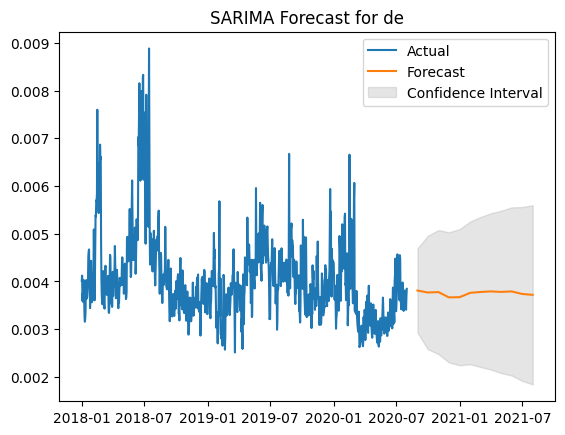

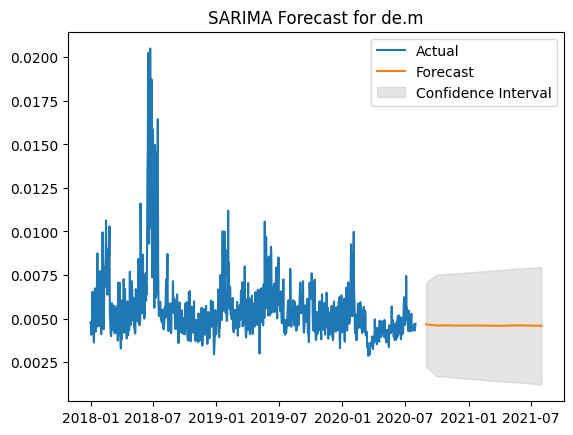

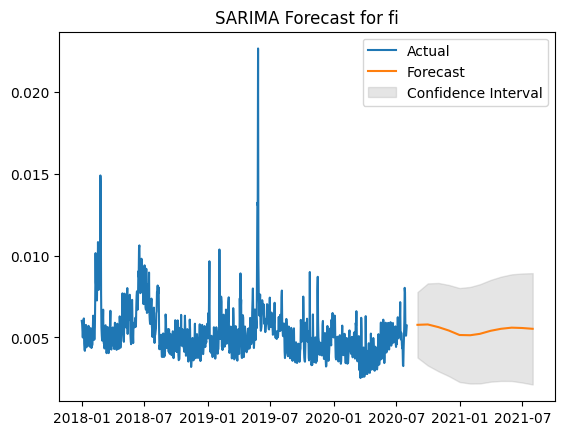

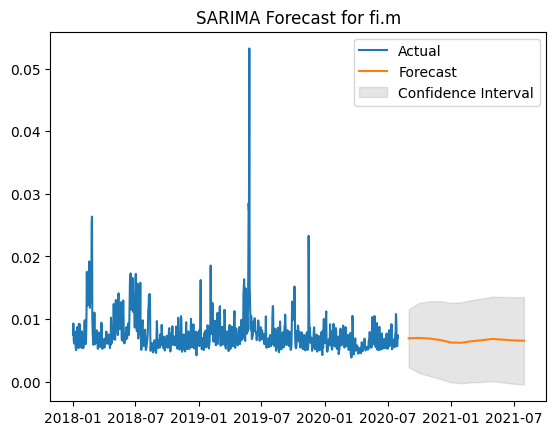

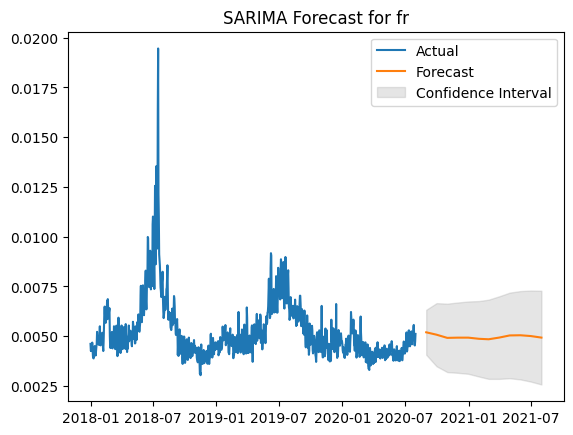

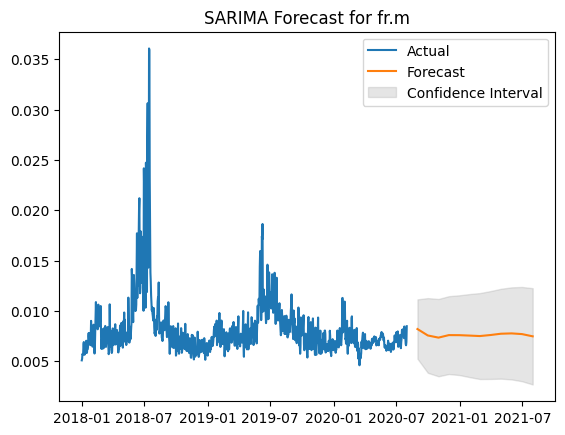

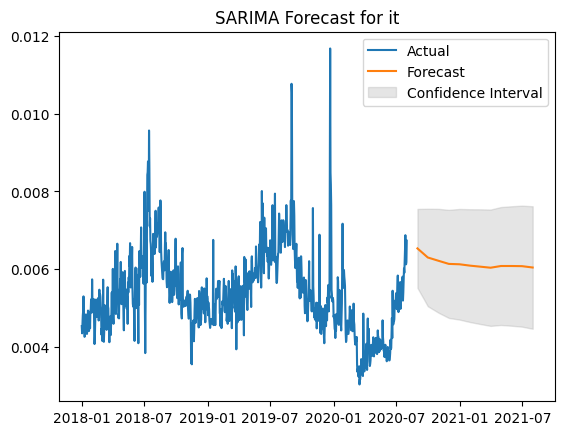

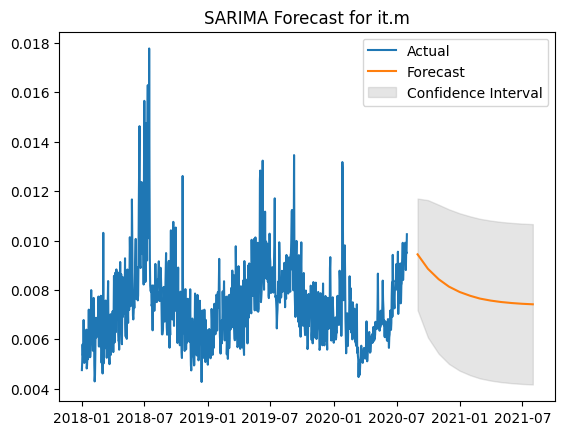

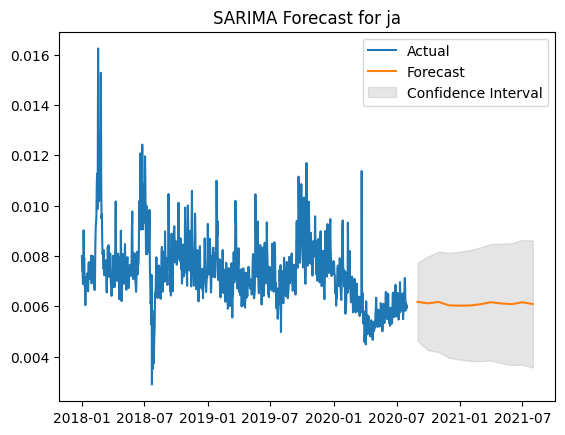

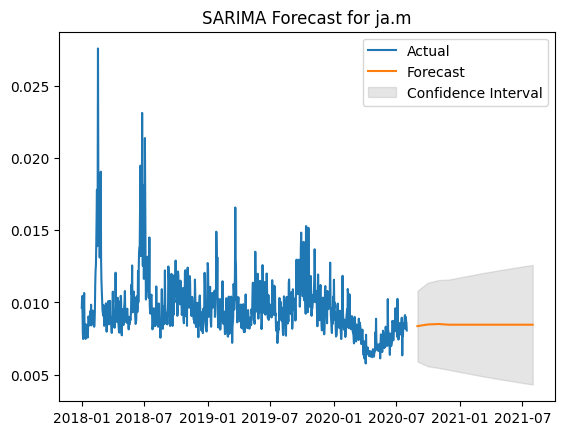

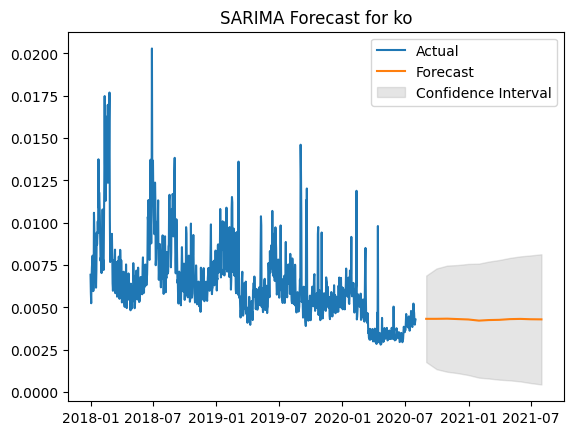

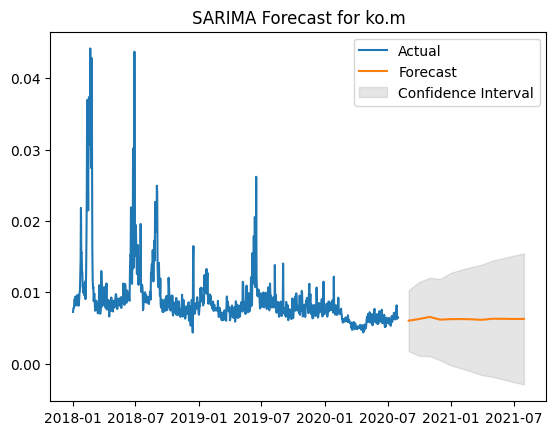

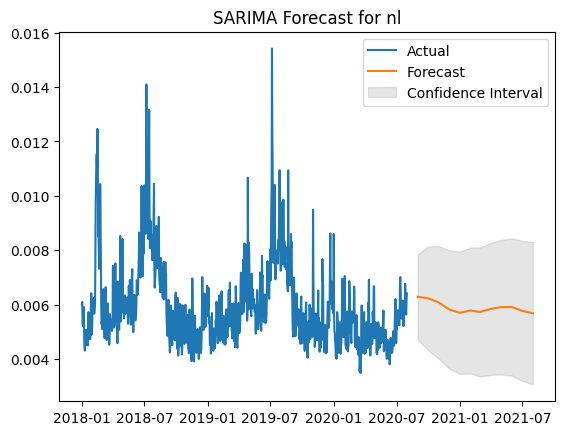

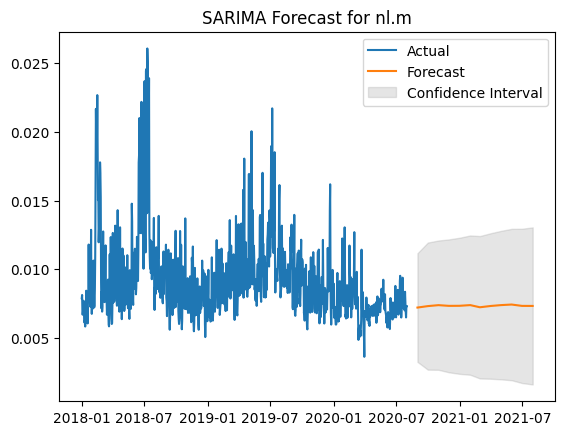

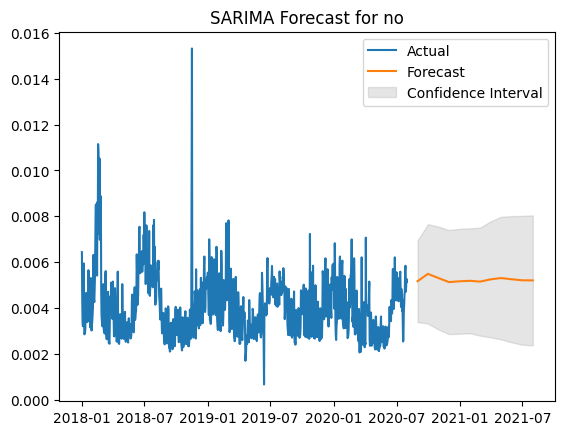

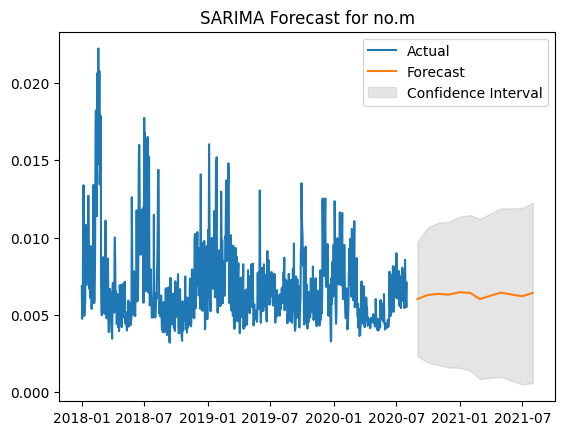

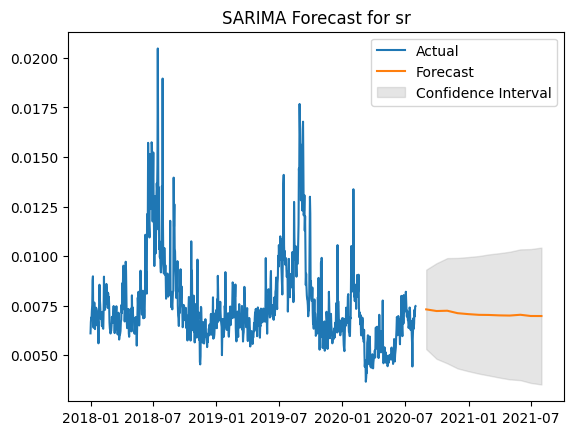

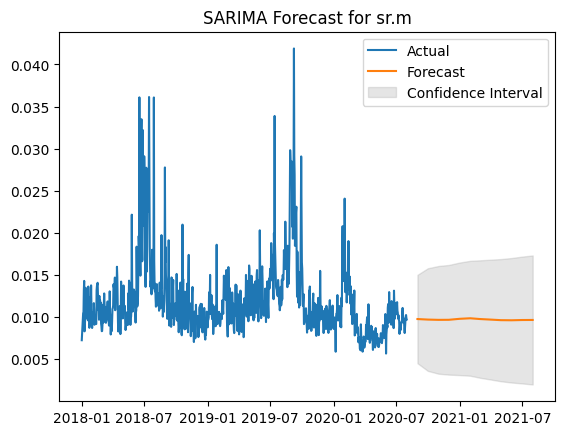

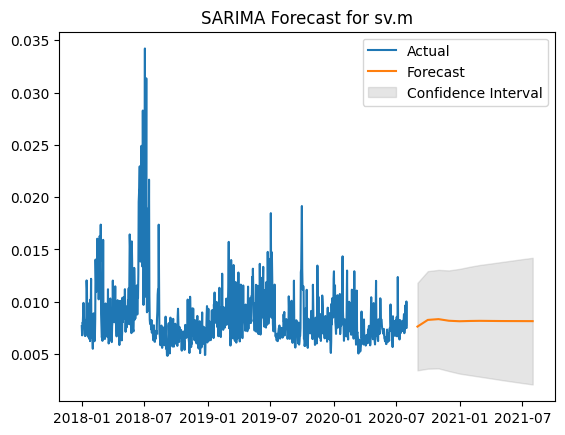

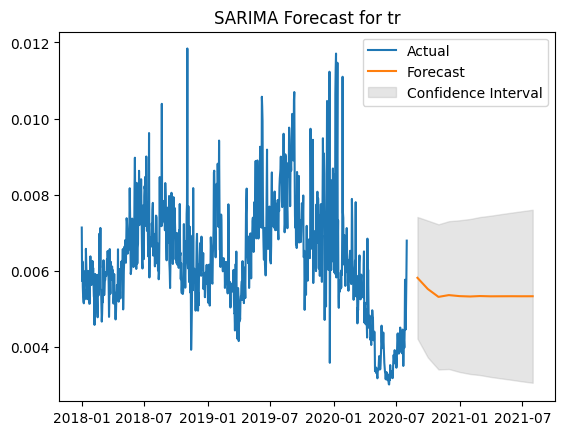

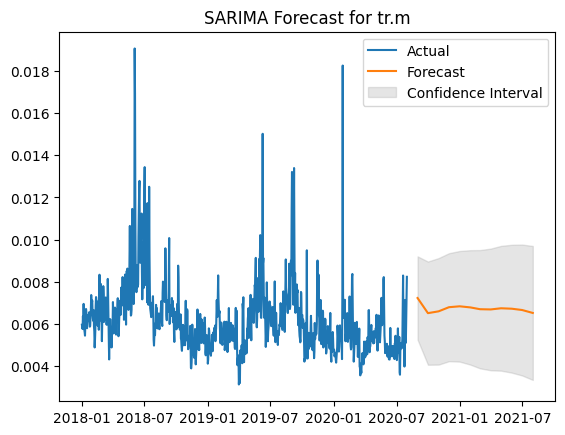

In [33]:
# Seasonal decomposition using statsmodels
for language in pivot_df.columns:
    result = seasonal_decompose(pivot_df[language], model='additive')
    result.plot()
    plt.suptitle(f'Seasonal Decomposition for {language}')

# SARIMA Time Series Forecasting
for language in pivot_df.columns:
    model = auto_arima(pivot_df[language], seasonal=True, m=12)  # Assuming a seasonal period of 12 for monthly data
    forecast, conf_int = model.predict(n_periods=12, return_conf_int=True)
    
    # Plot the forecast
    plt.figure()
    plt.plot(pivot_df.index, pivot_df[language], label='Actual') 
    plt.plot(pd.date_range(start=pivot_df.index[-1], periods=13, freq='M')[1:], forecast, label='Forecast')
    plt.fill_between(pd.date_range(start=pivot_df.index[-1], periods=13, freq='M')[1:],
                     conf_int[:, 0], conf_int[:, 1], color='gray', alpha=0.2, label='Confidence Interval')
    plt.title(f'SARIMA Forecast for {language}')
    plt.legend()
